# REGRESSION WITH BACKWARD ELIMINATION
This technique is used to filter out highly statistical values which highly effects in predicting values.



In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder as LE,OneHotEncoder as OE
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
import statsmodels.formula.api as sm

In [3]:
dataset=pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X=dataset.iloc[:,:4].values

In [5]:
Y=dataset.iloc[:,4].values

In [6]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [7]:
Y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

# CATEGORICAL VALUES OPERATION
ie. State

In [8]:
labelencoder=LE()
X[:,3]=labelencoder.fit_transform(X[:,3])
ohe=OE(categorical_features=[3])
X=ohe.fit_transform(X).toarray()
#below we have eliminated the 1st column of categorical value...... for now you just remember this it will dicussed in detail
#later... "IF YOU DONT WANT TO ELIMINATE IT WILL WORK FINE AND RESULT IS ALSO SAME"
X=X[:,1:]

# REGRESSION

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y , test_size=0.2 , random_state=0)
regressor=LR()
regressor.fit(X_train,Y_train)
xx=regressor.fit(X_train,Y_train).predict(X_test)
xx

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [10]:
Y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

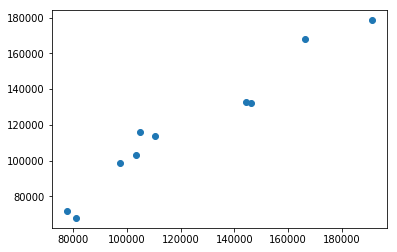

In [11]:
z=plt.scatter(Y_test,xx)
#here you can see that the prediction is mostly correct but it is not optimal 
#now we make it more accurate using backward elimination technique......

# FOLLOW PART-2 FOR BACKWARD ELIMINATION 